# EC7212 - Computer Vision and Image Processing  
# Take Home Assignment 2  

## EG/2020/4366

## Task 1 - Otsu’s Thresholding with Gaussian Noise

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1 – Create a Synthetic Image

In [2]:
def create_test_image(height=256, width=256):
    image = np.full((height, width), 50, dtype=np.uint8) 
    image[50:120, 30:150] = 150 
    image[150:220, 150:220] = 220 
    return image

## Step 2 – Add Gaussian Noise


In [3]:

def add_gaussian_noise(image, mean=0, sigma=30):
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image_clipped = np.clip(noisy_image, 0, 255)
    return noisy_image_clipped.astype(np.uint8)

## Step 3 – Implement Otsu’s Thresholding

In [ ]:
def otsu_threshold(image):
    pixel_counts = np.bincount(image.ravel(), minlength=256)
    total_pixels = image.size

    pixel_probabilities = pixel_counts / total_pixels

    best_threshold = -1
    max_variance = -1

    for t in range(1, 255):
        w0 = np.sum(pixel_probabilities[:t])
        w1 = np.sum(pixel_probabilities[t:])

        if w0 == 0 or w1 == 0:
            continue

        mu0 = np.sum(np.arange(t) * pixel_probabilities[:t]) / w0
        mu1 = np.sum(np.arange(t, 256) * pixel_probabilities[t:]) / w1

        between_class_variance = w0 * w1 * ((mu0 - mu1) ** 2)

        if between_class_variance > max_variance:
            max_variance = between_class_variance
            best_threshold = t

    return best_threshold

## Step 4 – Run the Complete Image Processing Flow


In [18]:
original_image = create_test_image()

noisy_image = add_gaussian_noise(original_image, sigma=35)

optimal_threshold = otsu_threshold(noisy_image)
print(f"Otsu's Optimal Threshold: {optimal_threshold}")

segmented_image = noisy_image > optimal_threshold

Otsu's Optimal Threshold: 112


## Step 5 – Visualization


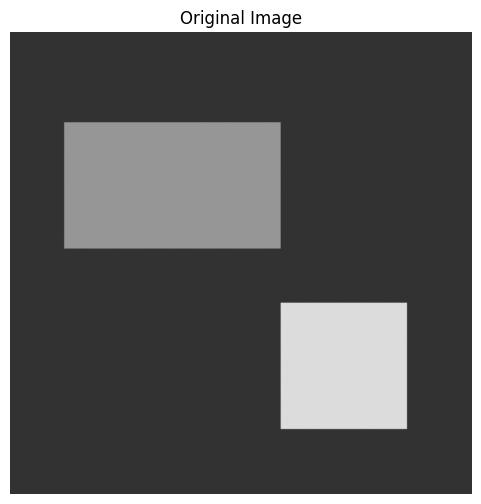

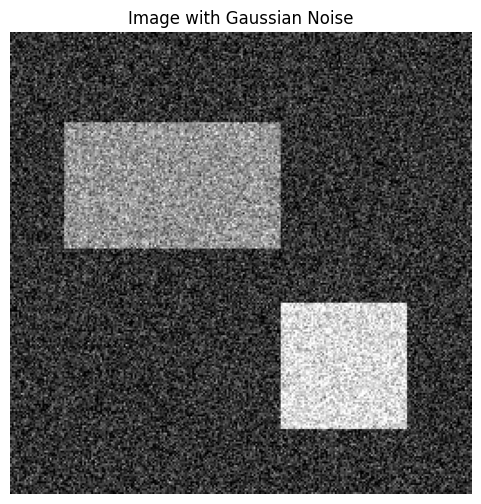

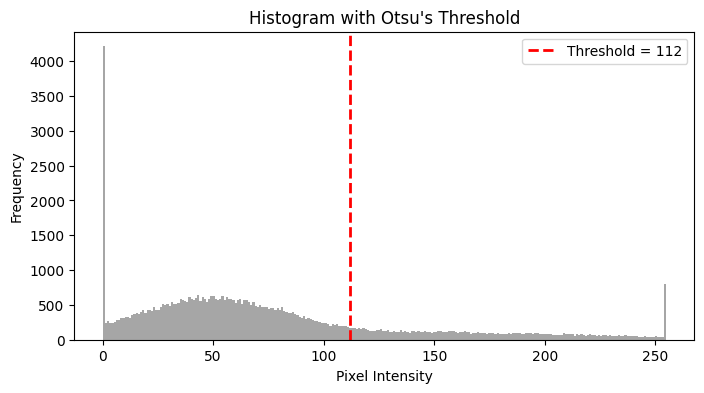

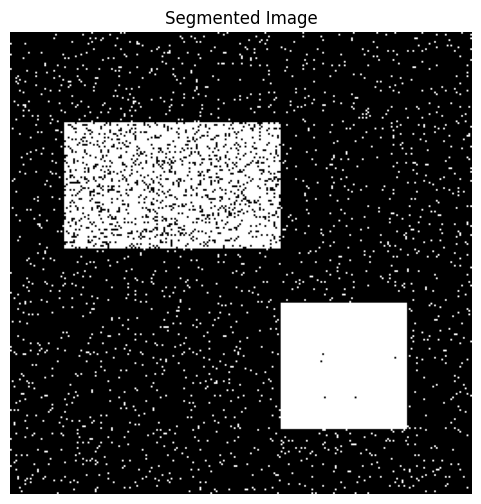

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.title('Image with Gaussian Noise')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(noisy_image.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.axvline(optimal_threshold, color='r', linestyle='dashed', linewidth=2)
plt.title("Histogram with Otsu's Threshold")
plt.legend([f"Threshold = {optimal_threshold}"])
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


## Task 2 - Region Growing Image Segmentation

## Import libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from PIL import Image
import os

## Step 1 - Upload and Display a Grayscale Image

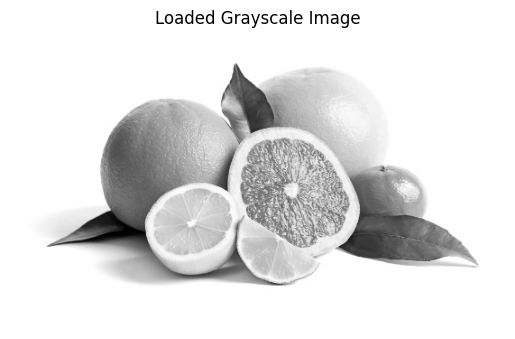

In [ ]:
mage_path = 'C:/Users/Nifras MJM/Desktop/GitHub/Computer-Vision-and-Image-Processing-THA2/images/citrus-fruit-collection.jpg'

image = Image.open(image_path).convert('L')  
image_np = np.array(image)

plt.imshow(image_np, cmap='gray')
plt.title("Loaded Grayscale Image")
plt.axis('off')
plt.show()


## Step 2 - Region Growing Function

In [15]:
def region_growing(image, seeds, threshold):
    if not seeds:
        return np.zeros_like(image, dtype=np.uint8)

    height, width = image.shape
    segmented_mask = np.zeros_like(image, dtype=np.uint8)
    queue = deque()
    
    reference_intensity = image[seeds[0][0], seeds[0][1]]

    for seed in seeds:
        y, x = seed
        if 0 <= y < height and 0 <= x < width:
            queue.append((y, x))
            segmented_mask[y, x] = 255

    while queue:
        y, x = queue.popleft()

        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                if dy == 0 and dx == 0:
                    continue

                ny, nx = y + dy, x + dx

                if 0 <= ny < height and 0 <= nx < width and segmented_mask[ny, nx] == 0:
                    neighbor_intensity = image[ny, nx]
                    if abs(int(neighbor_intensity) - int(reference_intensity)) <= threshold:
                        segmented_mask[ny, nx] = 255
                        queue.append((ny, nx))

    return segmented_mask


## Step 3 - Define Seed Point and Threshold

In [ ]:
seed_y = image_np.shape[0] // 2
seed_x = image_np.shape[1] // 2
seeds = [(seed_y, seed_x)]

threshold = 25

segmented_mask = region_growing(image_np, seeds, threshold)


## Step 4 - Perform Region Growing and Visualize

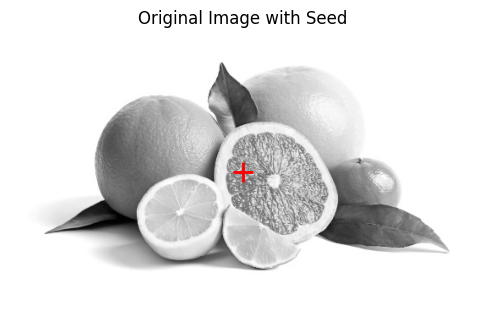

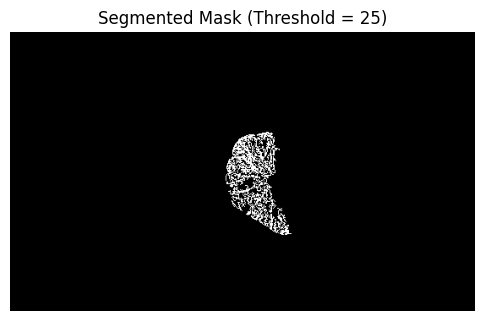

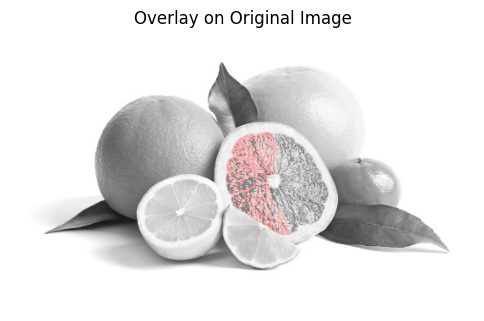

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(image_np, cmap='gray')
plt.plot(seeds[0][1], seeds[0][0], 'r+', markersize=15, markeredgewidth=2)
plt.title('Original Image with Seed')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(segmented_mask, cmap='gray')
plt.title(f'Segmented Mask (Threshold = {threshold})')
plt.axis('off')
plt.show()

overlay_image = np.stack([image_np]*3, axis=-1)
overlay_image[segmented_mask == 255, 0] = 255  

plt.figure(figsize=(6, 6))
plt.imshow(overlay_image)
plt.title('Overlay on Original Image')
plt.axis('off')
plt.show()
